## Лабораторная работа #2

Реализовать однослойную нейронную сеть, работающую по `правилу Хебба`.

Обучить её для классификации образов цифр.

In [1]:
from emnist import extract_training_samples
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

In [17]:
class NeuralNetwork:
    def __init__(self,
        input_nodes: int,
        out_nodes: int,
        lr: int,
    ):
        self.input_nodes = input_nodes
        self.outs = np.zeros(out_nodes)
        self.lr = lr
        self.diff = 0
        
        # Начальная инициализация весов
        self.weights = np.random.normal(
            0.0,
            0.1,
            (len(self.outs), self.input_nodes) # +1 нейрон смещения
        )

    def fit(self,
        X,
        Y,
    ):
        # Пробуем предсказать
        test_out = self.predict(X)

        # Преобразование данных к нужному виду
        X = np.array(X, ndmin=2).T
        Y = np.array(Y, ndmin=2).T
        
        _out = np.array(test_out, dtype=int),
        _y = np.array(Y.T[0], dtype=int),
        print(_out, _y)   
        # Обновление весов
        for j, y in enumerate(self.outs):
            if y != _y[0][j]:
                for i, x in enumerate(X):
                    if x != y:
                        self.weights[j][i] = self.weights[j][i] \
                            + self.lr * x * _y[0][j]
            else:
                self.diff += 1

    def predict(self, X):
        X = np.array(X, ndmin=2).T
        self.outs = []

        self.outs = np.array(list(map(self.act_func, np.dot(self.weights, X))))

        return self.outs

    def predict_proba(self, X):
        X = np.array(X, ndmin=2).T
        self.outs = []

        self.outs = np.array(np.dot(self.weights, X))
        return self.outs
    
    
    def act_func(self, x):
        return 1 if x >= 0 else -1

In [18]:
digits = np.array([
    [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2],
    [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 3],
])
digits[digits == 0] = -1

In [19]:
digits

array([[-1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1],
       [ 1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  2],
       [ 1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  3]])

In [20]:
def show_images(images):
    n = len(images)
    f = plt.figure(figsize=(10, 8))
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i][:-1].reshape((5, 3)))

    plt.show(block=True)

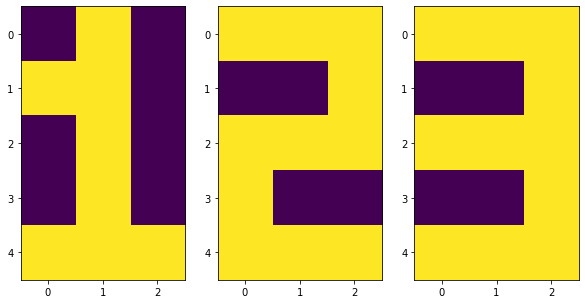

In [21]:
show_images(digits)

In [22]:
OUT_NODES = len(digits)

nn = NeuralNetwork(
    input_nodes=15,
    out_nodes=OUT_NODES,
    lr=1,
)

In [23]:
print(nn.predict(digits[0][:-1]), digits[0][-1])
print(nn.predict(digits[1][:-1]), digits[1][-1])
print(nn.predict(digits[2][:-1]), digits[2][-1])

[-1  1  1] 1
[-1  1 -1] 2
[-1 -1 -1] 3


In [24]:
train_data = digits.copy()

for epoch in tqdm(range(10)):
    np.random.shuffle(train_data)
    for digit in train_data:
        yi = digit[-1] - 1
        Y = np.zeros(OUT_NODES) - 1
        Y[yi] = 1
        X = digit[:-1].reshape(15)
        nn.fit(X, Y)

(array([-1, -1, -1]),) (array([-1, -1,  1]),)
(array([-1,  1, -1]),) (array([ 1, -1, -1]),)
(array([1, 1, 1]),) (array([-1,  1, -1]),)
(array([ 1, -1,  1]),) (array([ 1, -1, -1]),)
(array([-1,  1,  1]),) (array([-1,  1, -1]),)
(array([-1,  1,  1]),) (array([-1, -1,  1]),)
(array([-1,  1,  1]),) (array([-1, -1,  1]),)
(array([-1,  1,  1]),) (array([-1,  1, -1]),)
(array([ 1, -1, -1]),) (array([ 1, -1, -1]),)
(array([-1,  1,  1]),) (array([-1,  1, -1]),)
(array([-1, -1,  1]),) (array([-1, -1,  1]),)
(array([ 1, -1,  1]),) (array([ 1, -1, -1]),)
(array([ 1, -1, -1]),) (array([ 1, -1, -1]),)
(array([-1,  1,  1]),) (array([-1,  1, -1]),)
(array([-1, -1,  1]),) (array([-1, -1,  1]),)
(array([ 1, -1, -1]),) (array([ 1, -1, -1]),)
(array([-1,  1, -1]),) (array([-1,  1, -1]),)
(array([-1, -1,  1]),) (array([-1, -1,  1]),)
(array([-1, -1,  1]),) (array([-1, -1,  1]),)
(array([-1,  1, -1]),) (array([-1,  1, -1]),)
(array([ 1, -1, -1]),) (array([ 1, -1, -1]),)
(array([-1, -1,  1]),) (array([-1, -1

In [25]:
print(nn.predict(digits[0][:-1]), digits[0][-1])
print(nn.predict(digits[1][:-1]), digits[1][-1])
print(nn.predict(digits[2][:-1]), digits[2][-1])

[ 1 -1 -1] 1
[-1  1 -1] 2
[-1 -1  1] 3
